In [1]:
import pandas as pd
import numpy as np
import datetime 
from datetime import timedelta 
from IPython.core.display import display
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit

# Loading the data from csv files

energyB = pd.read_csv('./data/HomeB-meter1_2014.csv')
energyC = pd.read_csv('./data/HomeC-meter1_2016.csv')
energyF = pd.read_csv('./data/HomeF-meter3_2016.csv')
weatherB = pd.read_csv('./data/homeB2014.csv')
weatherC = pd.read_csv('./data/homeC2016.csv')
weatherF = pd.read_csv('./data/homeF2016.csv')

# Data Exploration

In [31]:
display(weatherB.head())
display(energyB.head())

,temperature,icon,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,dewPoint,precipProbability,Date & Time
0,34.98,partly-cloudy-night,0.64,10.00,Partly Cloudy,28.62,1017.69,7.75,0.29,1388534400,279,0.0,23.89,0.0,2014-01-01
1,16.49,clear-night,0.62,10.00,Clear,16.49,1022.76,2.71,0.06,1388538000,195,0.0,5.87,0.0,2014-01-01
2,14.63,clear-night,0.68,10.00,Clear,6.87,1022.32,4.84,0.03,1388541600,222,0.0,6.17,0.0,2014-01-01
3,13.31,clear-night,0.71,10.00,Clear,6.49,1021.64,4.00,0.14,1388545200,209,0.0,5.63,0.0,2014-01-01
4,13.57,clear-night,0.71,9.93,Clear,7.29,1020.73,3.67,0.04,1388548800,217,0.0,5.87,0.0,2014-01-01


,Date & Time,use [kW],gen [kW],Grid [kW],AC [kW],Furnace [kW],Cellar Lights [kW],Washer [kW],First Floor lights [kW],Utility Rm + Basement Bath [kW],Garage outlets [kW],MBed + KBed outlets [kW],Dryer + egauge [kW],Panel GFI (central vac) [kW],Home Office (R) [kW],Dining room (R) [kW],Microwave (R) [kW],Fridge (R) [kW]
0,2014-01-01,0.304439,0.0,0.304439,0.000058,0.009531,0.005336,0.000126,0.011175,0.003836,0.004836,0.002132,0.000009,0.007159,0.063666,0.004299,0.004733,0.042589
1,2014-01-01,0.656771,0.0,0.656771,0.001534,0.364338,0.005522,0.000043,0.003514,0.003512,0.004888,0.002137,0.000107,0.007221,0.064698,0.003589,0.004445,0.096008
2,2014-01-01,0.612895,0.0,0.612895,0.001847,0.417989,0.005504,0.000044,0.003528,0.003484,0.004929,0.002052,0.000170,0.007197,0.065109,0.003522,0.004396,0.025928
3,2014-01-01,0.683979,0.0,0.683979,0.001744,0.410653,0.005556,0.000059,0.003499,0.003476,0.004911,0.002068,0.000121,0.007236,0.065032,0.003404,0.004262,0.105472
4,2014-01-01,0.197809,0.0,0.197809,0.000030,0.017152,0.005302,0.000119,0.003694,0.003865,0.004876,0.002087,0.000052,0.007133,0.062451,0.003915,0.004407,0.016798


In [3]:
energyB.describe()

,use [kW],gen [kW],Grid [kW],AC [kW],Furnace [kW],Cellar Lights [kW],Washer [kW],First Floor lights [kW],Utility Rm + Basement Bath [kW],Garage outlets [kW],MBed + KBed outlets [kW],Dryer + egauge [kW],Panel GFI (central vac) [kW],Home Office (R) [kW],Dining room (R) [kW],Microwave (R) [kW],Fridge (R) [kW]
count,17520.000000,17520.0,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,1.752000e+04,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000
mean,0.662905,0.0,0.662905,0.088999,0.085888,0.011036,0.003067,0.015852,0.005105,0.005949,4.602680e-02,0.069099,0.005005,0.053700,0.004186,0.015237,0.073561
std,0.678399,0.0,0.678399,0.438887,0.129054,0.013123,0.020444,0.030792,0.020500,0.003621,7.525857e-02,0.430429,0.007543,0.037668,0.005455,0.066807,0.062182
min,0.011083,0.0,0.011083,0.000000,0.000117,0.000083,0.000000,0.000350,0.000017,0.000050,5.560000e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.314125,0.0,0.314125,0.000030,0.009340,0.005414,0.000099,0.003630,0.002388,0.004841,2.116667e-03,0.000030,0.000298,0.003468,0.001346,0.004153,0.006558
50%,0.468725,0.0,0.468725,0.000069,0.009704,0.005881,0.000219,0.003718,0.003737,0.004928,3.109528e-02,0.000058,0.006979,0.072627,0.003882,0.004624,0.070129
75%,0.700617,0.0,0.700617,0.000707,0.143531,0.007042,0.000333,0.015980,0.003876,0.005001,6.671972e-02,0.000096,0.007175,0.077099,0.004446,0.004877,0.129642
max,6.833205,0.0,6.833205,3.687768,0.437212,0.146692,0.819167,0.423816,0.476571,0.047370,1.514727e+00,4.287879,0.366653,0.211308,0.074872,1.701807,0.410929


In [4]:
weatherB.describe()

,temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,dewPoint,precipProbability
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,7290.000000,8.760000e+03,8760.00000,8760.000000,8760.000000,8760.000000
mean,48.062076,0.682888,9.025791,45.289160,1016.450749,6.534568,0.137971,1.404301e+09,204.46347,0.003761,37.072056,0.066771
std,19.694743,0.188763,1.859263,22.860668,7.903670,3.884500,0.212384,9.104179e+06,106.57823,0.015565,20.257221,0.183459
min,-10.070000,0.140000,0.320000,-18.280000,979.980000,0.030000,0.000000,1.388534e+09,0.00000,0.000000,-15.870000,0.000000
25%,33.165000,0.530000,9.040000,27.967500,1011.530000,3.630000,0.000000,1.396418e+09,150.00000,0.000000,23.425000,0.000000
50%,49.220000,0.710000,9.970000,47.360000,1016.430000,5.850000,0.060000,1.404301e+09,210.00000,0.000000,38.510000,0.000000
75%,63.832500,0.860000,10.000000,63.832500,1021.310000,8.692500,0.200000,1.412184e+09,297.00000,0.000000,54.302500,0.000000
max,89.460000,0.960000,10.000000,97.520000,1042.400000,24.750000,1.000000,1.420067e+09,359.00000,0.355700,72.880000,0.870000


# Data Preprocessing

In [5]:
# Convert to Date Time Format
energyB['Date & Time'] = pd.to_datetime(energyB['Date & Time'])
energyC['Date & Time'] = pd.to_datetime(energyC['Date & Time'])
energyF['Date & Time'] = pd.to_datetime(energyF['Date & Time'])

We need to change the column name of energyF data frame from 'Usage [kW]' to 'use [kW]' for consistency across different datasets.

In [6]:
# Changing column name
energyF = energyF.rename(columns={'Usage [kW]': 'use [kW]'})

In [7]:
print("Shape of Data for House B (Energy Usage):", energyB.shape)
print("Shape of Data for House B (Weather):", weatherB.shape)
print("Shape of Data for House C (Energy Usage):", energyC.shape)
print("Shape of Data for House C (Weather):", weatherC.shape)
print("Shape of Data for House F (Energy Usage):", energyF.shape)
print("Shape of Data for House F (Weather):", weatherF.shape)


Shape of Data for House B (Energy Usage): (17520, 18)
Shape of Data for House B (Weather): (8760, 14)
Shape of Data for House C (Energy Usage): (503910, 19)
Shape of Data for House C (Weather): (8760, 14)
Shape of Data for House F (Energy Usage): (503925, 10)
Shape of Data for House F (Weather): (8760, 14)


The count of the above datasets show. We need to convert the number of rows in
Weather data corresponds to number of hours in a year (365*24 = 8760). 


In [8]:
# Merge energy bihourly data into hourly data
energyB['Date & Time'] = energyB["Date & Time"].dt.floor('H')
energyC['Date & Time'] = energyC["Date & Time"].dt.floor('H')
energyF['Date & Time'] = energyF["Date & Time"].dt.floor('H')
energy_hourly_B = energyB.groupby('Date & Time').sum().reset_index()
energy_hourly_C = energyC.groupby('Date & Time').sum().reset_index()
energy_hourly_F = energyF.groupby('Date & Time').sum().reset_index()

In [9]:
energyB['Date & Time'] = energyB["Date & Time"].dt.floor('D')
energyC['Date & Time'] = energyC["Date & Time"].dt.floor('D')
energyF['Date & Time'] = energyF["Date & Time"].dt.floor('D')
energy_daily_B = energyB.groupby('Date & Time').sum().reset_index()
energy_daily_C = energyC.groupby('Date & Time').sum().reset_index()
energy_daily_F = energyF.groupby('Date & Time').sum().reset_index()


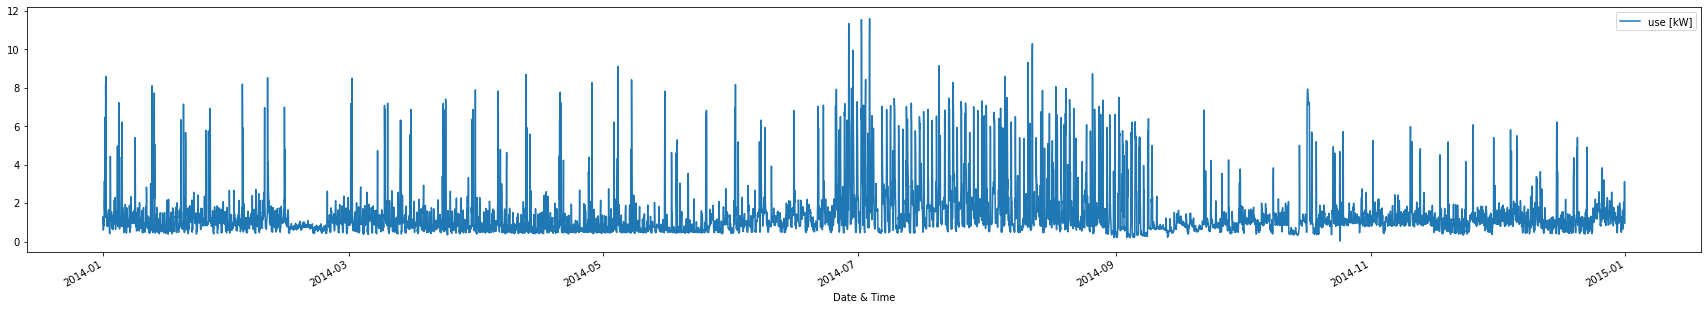

In [10]:
# Plot graphs for both the diagrams

energy_hourly_B.plot(kind='line', x='Date & Time', y='use [kW]', figsize=(30, 5))
pyplot.show()

In [11]:
def getDateTime(inputYear, df):
    currenttime = datetime.datetime(inputYear,1,1,0,0,0) 
    datearr = []
    for index, row in df.iterrows():
        datearr.append(currenttime)
        #add delta of one hour to each iteration
        currenttime = currenttime + timedelta(hours=1)
    return datearr

weatherB['Date & Time'] =  getDateTime(2014, weatherB)
weatherC['Date & Time'] =  getDateTime(2016, weatherC)
weatherF['Date & Time'] =  getDateTime(2016, weatherF)
weather_hourly_B = weatherB.copy()
weather_hourly_C = weatherC.copy()
weather_hourly_F = weatherF.copy()

weatherB['Date & Time'] = weatherB["Date & Time"].dt.floor('D')
weatherC['Date & Time'] = weatherC["Date & Time"].dt.floor('D')
weatherF['Date & Time'] = weatherF["Date & Time"].dt.floor('D')
weather_daily_B = weatherB.groupby('Date & Time').median().reset_index()
weather_daily_C = weatherC.groupby('Date & Time').median().reset_index()
weather_daily_F = weatherF.groupby('Date & Time').median().reset_index()

In [12]:
weatherData=[weather_hourly_B, weather_hourly_C, weather_hourly_F, weather_daily_B, weather_daily_C, weather_daily_F]
energyData = [energy_hourly_B, energy_hourly_C, energy_hourly_F, energy_daily_B, energy_daily_C, energy_daily_F]
tag = ['House B (Hourly)','House C (Hourly)','House F (Hourly)','House B (Daily)','House C (Daily)','House F (Daily)']

models=[]
maeBHourly=[]
maeCHourly=[]
maeFHourly=[]
maeBDaily=[]
maeCDaily=[]
maeFDaily=[]
aggregate=[maeBHourly,maeCHourly,maeFHourly,maeBDaily,maeCDaily,maeFDaily]

In [32]:
# from pandas.plotting import scatter_matrix
# scatter_matrix(energy_hourly_B, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

## Naive Method Prediction


In [13]:
# NAIVE Method Prediction
def naiveMethodPredictor(dataset, split):
    train_Y = dataset[:split]
    test_Y = dataset[split:]
    count = len(test_Y)
    predict_Y = pd.DataFrame(np.asarray(train_Y)[len(train_Y) - 1][0], index=np.arange(count), columns=['predicted'])
    mae = mean_absolute_error(test_Y, predict_Y)
    return mae

In [14]:
models.append("Naive Method")

splitHB = len(energy_hourly_B.loc[energy_hourly_B['Date & Time'] <= '2014-12-01 00:00:00'])
maeVal = naiveMethodPredictor(energy_hourly_B[['use [kW]']], splitHB)
maeBHourly.append(maeVal)
print("The Mean Absolute Error of Naive method for Hourly points on House B is :", maeVal)

splitHC = len(energy_hourly_C.loc[energy_hourly_C['Date & Time'] <= '2016-12-01 00:00:00'])
maeVal = naiveMethodPredictor(energy_hourly_C[['use [kW]']], splitHC)
maeCHourly.append(maeVal)
print("The Mean Absolute Error of Naive method for Hourly points on House C is :", maeVal)

splitHF = len(energy_hourly_F.loc[energy_hourly_F['Date & Time'] <= '2016-12-01 00:00:00'])
maeVal = naiveMethodPredictor(energy_hourly_F[['use [kW]']], splitHF)
maeFHourly.append(maeVal)
print("The Mean Absolute Error of Naive method for Hourly points on House F is :", maeVal)

splitDB = len(energy_daily_B.loc[energy_daily_B['Date & Time'] <= '2014-12-01 00:00:00'])
maeVal = naiveMethodPredictor(energy_daily_B[['use [kW]']], splitDB)
maeBDaily.append(maeVal)
print("The Mean Absolute Error of Naive method for Daily points on House B is :", maeVal)

splitDC = len(energy_daily_C.loc[energy_daily_C['Date & Time'] <= '2016-12-01 00:00:00'])
maeVal = naiveMethodPredictor(energy_daily_C[['use [kW]']], splitDC)
maeCDaily.append(maeVal)
print("The Mean Absolute Error of Naive method for Daily points on House C is :", maeVal)

splitDF = len(energy_daily_F.loc[energy_daily_F['Date & Time'] <= '2016-12-01 00:00:00'])
maeVal = naiveMethodPredictor(energy_daily_F[['use [kW]']], splitDF)
maeFDaily.append(maeVal)
print("The Mean Absolute Error of Naive method for Daily points on House F is :", maeVal)


The Mean Absolute Error of Naive method for Hourly points on House B is : 0.4795294990740242
The Mean Absolute Error of Naive method for Hourly points on House C is : 21.314182542027936
The Mean Absolute Error of Naive method for Hourly points on House F is : 52.4850792830335
The Mean Absolute Error of Naive method for Daily points on House B is : 6.231544518466666
The Mean Absolute Error of Naive method for Daily points on House C is : 265.1860666682843
The Mean Absolute Error of Naive method for Daily points on House F is : 475.2387535685007


In [15]:
splitPoints=[]
splitPoints.append(splitHB)
splitPoints.append(splitHC)
splitPoints.append(splitHF)
splitPoints.append(splitDB)
splitPoints.append(splitDC)
splitPoints.append(splitDF)

# Linear Regression
Description about linear regression


In [16]:
# Train Linear Regression model and predict

def LinearRegressionModel(features, target, split):
    xtrain = features[:split][['temperature']].reset_index(drop=True)
    ytrain = target[:split][['use [kW]']].reset_index(drop=True)
    ytest = target[split:][['use [kW]']].reset_index(drop=True)
    xtest = features[split : (split + len(ytest))][['temperature']].reset_index(drop=True)
    linear_regressor = LinearRegression()
    model = linear_regressor.fit(xtrain, ytrain)
    mae = mean_absolute_error(ytest, linear_regressor.predict(xtest))
    return mae



In [17]:
models.append("Linear Regression")

maeVal = LinearRegressionModel(weather_hourly_B, energy_hourly_B, splitHB)
maeBHourly.append(maeVal)
print("The Mean Absolute Error for Linear Regression for hourly points on House B is", maeVal)

maeVal = LinearRegressionModel(weather_hourly_C, energy_hourly_C, splitHC)
maeCHourly.append(maeVal)
print("The Mean Absolute Error for Linear Regression for hourly points on House C is", maeVal)

maeVal = LinearRegressionModel(weather_hourly_F, energy_hourly_F, splitHF)
maeFHourly.append(maeVal)
print("The Mean Absolute Error for Linear Regression for hourly points on House F is", maeVal)

maeVal = LinearRegressionModel(weather_daily_B, energy_daily_B, splitDB)
maeBDaily.append(maeVal)
print("The Mean Absolute Error for Linear Regression for daily points on House B is", maeVal)

maeVal = LinearRegressionModel(weather_daily_C, energy_daily_C, splitDC)
maeCDaily.append(maeVal)
print("The Mean Absolute Error for Linear Regression for daily points on House C is", maeVal)

maeVal = LinearRegressionModel(weather_daily_F, energy_daily_F, splitDF)
maeFDaily.append(maeVal)
print("The Mean Absolute Error for Linear Regression for daily points on House F is", maeVal)


The Mean Absolute Error for Linear Regression for hourly points on House B is 0.4728773052303468
The Mean Absolute Error for Linear Regression for hourly points on House C is 19.491857001825277
The Mean Absolute Error for Linear Regression for hourly points on House F is 45.19401521652007
The Mean Absolute Error for Linear Regression for daily points on House B is 6.158893086995789
The Mean Absolute Error for Linear Regression for daily points on House C is 235.7501371528122
The Mean Absolute Error for Linear Regression for daily points on House F is 382.63626484530516


# Decision Tree Regressor

In [18]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen."""
    score = r2_score(y_true, y_predict)
    return score

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    regressor = DecisionTreeRegressor()
    params = dict(max_depth=[1,2,3,4,5,6,7,8,9,10])
    scoring_fnc = make_scorer(performance_metric)
    grid = GridSearchCV(regressor,params,scoring=scoring_fnc)
    grid = grid.fit(X, y)
    return grid.best_estimator_

def DecisionTreeModel(features, target, split):
    xtrain = features[:split][['temperature']].reset_index(drop=True)
    ytrain = target[:split][['use [kW]']].reset_index(drop=True)
    ytest = target[split:][['use [kW]']].reset_index(drop=True)
    xtest = features[split : (split + len(ytest))][['temperature']].reset_index(drop=True)
    model = fit_model(xtrain, ytrain)
    print("Parameter 'max_depth' is {} for the optimal model.".format(model.get_params()['max_depth']))
    mae = mean_absolute_error(ytest, model.predict(xtest))
    return mae

In [19]:
models.append("Decision Tree (With Grid Search)")

maeVal = DecisionTreeModel(weather_hourly_B, energy_hourly_B, splitHB)
maeBHourly.append(maeVal)
print("The Mean Absolute Error for DecisionTree Model for hourly points on House B is", maeVal)

maeVal = DecisionTreeModel(weather_hourly_C, energy_hourly_C, splitHC)
maeCHourly.append(maeVal)
print("The Mean Absolute Error for DecisionTree Model for hourly points on House C is", maeVal)

maeVal = DecisionTreeModel(weather_hourly_F, energy_hourly_F, splitHF)
maeFHourly.append(maeVal)
print("The Mean Absolute Error for DecisionTree Model for hourly points on House F is", maeVal)

maeVal = DecisionTreeModel(weather_daily_B, energy_daily_B, splitDB)
maeBDaily.append(maeVal)
print("The Mean Absolute Error for DecisionTree Model for daily points on House B is", maeVal)

maeVal = DecisionTreeModel(weather_daily_C, energy_daily_C, splitDC)
maeCDaily.append(maeVal)
print("The Mean Absolute Error for DecisionTree Model for daily points on House C is", maeVal)

maeVal = DecisionTreeModel(weather_daily_F, energy_daily_F, splitDF)
maeFDaily.append(maeVal)
print("The Mean Absolute Error for DecisionTree Model for daily points on House F is", maeVal)

Parameter 'max_depth' is 3 for the optimal model.
The Mean Absolute Error for DecisionTree Model for hourly points on House B is 0.48069220987750455
Parameter 'max_depth' is 3 for the optimal model.
The Mean Absolute Error for DecisionTree Model for hourly points on House C is 19.51213885595348
Parameter 'max_depth' is 2 for the optimal model.
The Mean Absolute Error for DecisionTree Model for hourly points on House F is 48.850876132589796
Parameter 'max_depth' is 1 for the optimal model.
The Mean Absolute Error for DecisionTree Model for daily points on House B is 6.228120276068112
Parameter 'max_depth' is 2 for the optimal model.
The Mean Absolute Error for DecisionTree Model for daily points on House C is 205.76196153592724
Parameter 'max_depth' is 2 for the optimal model.
The Mean Absolute Error for DecisionTree Model for daily points on House F is 449.8092677889028


In [20]:
def DecisionTree(features, target, split):
    xtrain = features[:split][['temperature']].reset_index(drop=True)
    ytrain = target[:split][['use [kW]']].reset_index(drop=True)
    ytest = target[split:][['use [kW]']].reset_index(drop=True)
    xtest = features[split : (split + len(ytest))][['temperature']].reset_index(drop=True)
    regressor = DecisionTreeRegressor(random_state=0)
    model = regressor.fit(xtrain, ytrain.values.ravel())
    mae = mean_absolute_error(ytest, model.predict(xtest))
    return mae

In [21]:
models.append("Decision Tree (Without Grid Search)")

maeVal = DecisionTree(weather_hourly_B, energy_hourly_B, splitHB)
maeBHourly.append(maeVal)
print("The Mean Absolute Error for DecisionTree Model for hourly points on House B is", maeVal)

maeVal = DecisionTree(weather_hourly_C, energy_hourly_C, splitHC)
maeCHourly.append(maeVal)
print("The Mean Absolute Error for DecisionTree Model for hourly points on House C is", maeVal)

maeVal = DecisionTree(weather_hourly_F, energy_hourly_F, splitHF)
maeFHourly.append(maeVal)
print("The Mean Absolute Error for DecisionTree Model for hourly points on House F is", maeVal)

maeVal = DecisionTree(weather_daily_B, energy_daily_B, splitDB)
maeBDaily.append(maeVal)
print("The Mean Absolute Error for DecisionTree Model for daily points on House B is", maeVal)

maeVal = DecisionTree(weather_daily_C, energy_daily_C, splitDC)
maeCDaily.append(maeVal)
print("The Mean Absolute Error for DecisionTree Model for daily points on House C is", maeVal)

maeVal = DecisionTree(weather_daily_F, energy_daily_F, splitDF)
maeFDaily.append(maeVal)
print("The Mean Absolute Error for DecisionTree Model for daily points on House F is", maeVal)

The Mean Absolute Error for DecisionTree Model for hourly points on House B is 0.6338045385206819
The Mean Absolute Error for DecisionTree Model for hourly points on House C is 24.74983309109437
The Mean Absolute Error for DecisionTree Model for hourly points on House F is 64.75027675373532
The Mean Absolute Error for DecisionTree Model for daily points on House B is 9.268956388233331
The Mean Absolute Error for DecisionTree Model for daily points on House C is 279.11774226274946
The Mean Absolute Error for DecisionTree Model for daily points on House F is 519.4746059551435


In [22]:
decisionTree = pd.DataFrame({
    'Models': models,
    'House B (Hourly)': maeBHourly,
    'House C (Hourly)': maeCHourly,
    'House F (Hourly)': maeFHourly,
    'House B (Daily)': maeBDaily,
    'House C (Daily)': maeCDaily,
    'House F (Daily)': maeFDaily,
})
print("Differences between MAEs:")
display(decisionTree.loc[2:3])

Differences between MAEs:


,Models,House B (Hourly),House C (Hourly),House F (Hourly),House B (Daily),House C (Daily),House F (Daily)
2,Decision Tree (With Grid Search),0.480692,19.512139,48.850876,6.228120,205.761962,449.809268
3,Decision Tree (Without Grid Search),0.633805,24.749833,64.750277,9.268956,279.117742,519.474606


Hence its clear how **Grid Search parameter Tuning** Improves the MAE of the output

## Random Forest

Random Forest Regressor

In [23]:
def RandomForestModel(features, target, split):
    xtrain = features[:split][['temperature']].reset_index(drop=True)
    ytrain = target[:split][['use [kW]']].reset_index(drop=True)
    ytest = target[split:][['use [kW]']].reset_index(drop=True)
    xtest = features[split : (split + len(ytest))][['temperature']].reset_index(drop=True)
    
    randomforest = RandomForestRegressor(random_state=3)
    params = dict(max_depth=[1,2,3,4,5,6,7,8,9,10])
    scoring_fnc = make_scorer(performance_metric)
    grid = GridSearchCV(randomforest,params,scoring=scoring_fnc)
    grid = grid.fit(xtrain, ytrain.values.ravel())
    model =  grid.best_estimator_
    mae = mean_absolute_error(ytest, model.predict(xtest))
    return mae



In [24]:
models.append("Random Forest")

maeVal = RandomForestModel(weather_hourly_B, energy_hourly_B, splitHB)
maeBHourly.append(maeVal)
print("The Mean Absolute Error for Random Forest for hourly points on House B is", maeVal)

maeVal = RandomForestModel(weather_hourly_C, energy_hourly_C, splitHC)
maeCHourly.append(maeVal)
print("The Mean Absolute Error for Random Forest for hourly points on House C is", maeVal)

maeVal = RandomForestModel(weather_hourly_F, energy_hourly_F, splitHF)
maeFHourly.append(maeVal)
print("The Mean Absolute Error for Random Forest for hourly points on House F is", maeVal)

maeVal = RandomForestModel(weather_daily_B, energy_daily_B, splitDB)
maeBDaily.append(maeVal)
print("The Mean Absolute Error for Random Forest for daily points on House B is", maeVal)

maeVal = RandomForestModel(weather_daily_C, energy_daily_C, splitDC)
maeCDaily.append(maeVal)
print("The Mean Absolute Error for Random Forest for daily points on House C is", maeVal)

maeVal = RandomForestModel(weather_daily_F, energy_daily_F, splitDF)
maeFDaily.append(maeVal)
print("The Mean Absolute Error for Random Forest for daily points on House F is", maeVal)

The Mean Absolute Error for Random Forest for hourly points on House B is 0.4803484659411037
The Mean Absolute Error for Random Forest for hourly points on House C is 19.253721485161932
The Mean Absolute Error for Random Forest for hourly points on House F is 48.94799343242547
The Mean Absolute Error for Random Forest for daily points on House B is 7.044251753606014
The Mean Absolute Error for Random Forest for daily points on House C is 181.58895549725403
The Mean Absolute Error for Random Forest for daily points on House F is 381.3886754158294


## ARIMA

In [25]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [26]:
def GetBestModel(train, test, split):
    ypredicted=[]
    optimalp =0
    optimald = 0
    leasterror = float("inf")
    for p in range(0,10):
        for d in range(0,2):
            newmodel = ARIMA(train, order=(p,d,0))
            model_fit = newmodel.fit()
            ypredicted = model_fit.predict(start=split, end=(split+len(test)-1)) 
            error = mean_absolute_error(test, ypredicted)
            if(error<leasterror):
                leasterror = error
                optimalp = p
                optimald = d
    
    return optimalp,optimald

def ArimaModel(train, test, split, optimalp, optimald):
    model = ARIMA(train, order=(optimalp,optimald,0))
    model = model.fit()
    ypredicted = model.predict(start=split, end=(split+len(test)-1)) 
    mae = mean_absolute_error(test, ypredicted)
    return mae
    

In [27]:
models.append("ARIMA")
for i in range(6):
    target = energyData[i][['use [kW]']].values
    split = splitPoints[i]
    train = target[:split]
    test = target[split:]
    optimalp,optimald = GetBestModel(train, test, split)
    print("Best P & D Values are :", optimalp, "  ", optimald)
    mae = ArimaModel(train, test, split, optimalp, optimald)
    print ("The Mean Absolute Error for ARIMA Model for ", tag[i], "is :", mae)
    aggregate[i].append(mae)


Best P & D Values are : 6    0
The Mean Absolute Error for ARIMA Model for  House B (Hourly) is : 0.5215728809115998
Best P & D Values are : 1    0
The Mean Absolute Error for ARIMA Model for  House C (Hourly) is : 18.928397353200772
Best P & D Values are : 1    0
The Mean Absolute Error for ARIMA Model for  House F (Hourly) is : 56.83216947626697
Best P & D Values are : 8    0
The Mean Absolute Error for ARIMA Model for  House B (Daily) is : 6.291542500487939
Best P & D Values are : 2    0
The Mean Absolute Error for ARIMA Model for  House C (Daily) is : 209.01621190996755
Best P & D Values are : 6    0
The Mean Absolute Error for ARIMA Model for  House F (Daily) is : 413.6081214149195


# Final Results

In [28]:
results = pd.DataFrame({
    'Models': models,
    'House B (Hourly)': maeBHourly,
    'House C (Hourly)': maeCHourly,
    'House F (Hourly)': maeFHourly,
    'House B (Daily)': maeBDaily,
    'House C (Daily)': maeCDaily,
    'House F (Daily)': maeFDaily,
})
print("The final results on MAEs:")
display(results)

The final results on MAEs:


,Models,House B (Hourly),House C (Hourly),House F (Hourly),House B (Daily),House C (Daily),House F (Daily)
0,Naive Method,0.479529,21.314183,52.485079,6.231545,265.186067,475.238754
1,Linear Regression,0.472877,19.491857,45.194015,6.158893,235.750137,382.636265
2,Decision Tree (With Grid Search),0.480692,19.512139,48.850876,6.228120,205.761962,449.809268
3,Decision Tree (Without Grid Search),0.633805,24.749833,64.750277,9.268956,279.117742,519.474606
4,Random Forest,0.480348,19.253721,48.947993,7.044252,181.588955,381.388675
5,ARIMA,0.521573,18.928397,56.832169,6.291543,209.016212,413.608121
